# Chapter 8. Pandas 그룹 연산과 데이터 집계

#### RegularSeasonCompactResults 데이터셋 예제
- CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.
- 미국대학농구(NCAA)의 1985부터 2016년 까지의 자료를 예제로 사용. 
- CSV 파일로 되어 있으며 **pd.read_csv()** 를 이용하여 읽어들이면 **dataframe** 변수 형태로 내용을 반환한다.
- 참고로 파일은 다음과 같은 형태로 저장되어 있다.
```text
Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1985,20,1228,81,1328,64,N,0
1985,25,1106,77,1354,70,H,0
1985,25,1112,63,1223,56,H,0
1985,25,1165,70,1432,54,H,0
...
```
- Season: 경기 년도
- Wteam: 이긴 팀
- Wscore: 이긴 팀의 점수
- Lteam: 진 팀
- Lscore: 진 팀의 점수
- Wloc: 이긴 팀 기준으로 한 장소 - H(Home), N(Neutral), A(Away)

참고: https://github.com/adeshpande3/Pandas-Tutorial/blob/master/Pandas%20Tutorial.ipynb

In [10]:
import pandas as pd
df = pd.read_csv('./data/RegularSeasonCompactResults.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145289 entries, 0 to 145288
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Season  145289 non-null  int64 
 1   Daynum  145289 non-null  int64 
 2   Wteam   145289 non-null  int64 
 3   Wscore  145289 non-null  int64 
 4   Lteam   145289 non-null  int64 
 5   Lscore  145289 non-null  int64 
 6   Wloc    145289 non-null  object
 7   Numot   145289 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.9+ MB


In [12]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000,145289.000000
mean,2001.574834,75.223816,1286.720646,76.600321,1282.864064,64.497009,0.044387
std,9.233342,33.287418,104.570275,12.173033,104.829234,11.380625,0.247819
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2002.000000,78.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1379.000000,84.000000,1375.000000,72.000000,0.000000
max,2016.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


**value_counts()**: 매우 빈번하고 유용하게 쓰이는 함수
- 특정 열에 사용된 값들에 대해 횟수를 계산하여 보여준다. 
- 아래 예에서는 Season 열에서 각 시즌(연도) 값의 수를 연도 별로 보여준다.

In [13]:
df['Season'].value_counts().head() #연도별 행(게임)의 수

Season
2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
Name: count, dtype: int64

### 1. 그룹 연산의 이해
- 그룹 연산은 분리(split), 적용(apply), 결합(combine)의 단계로 이루어짐
- 분리는 Pandas에 있는 데이터를 하나 이상의 키를 기준으로 해서 각 그룹으로 분리하는 것을 의미
    - 아래 그림을 보면, 키(key)의 각 값 별로 그룹을 분리한 것을 볼 수 있음
- 적용은 각 그룹에 대해 연산(예:sum)을 수행하는 것을 의미
    - 아래 예에서는 키 값이 A인 그룹, B인 그룹 등 각 그룹에 대해 sum() 연산을 수행
- 결합은 각 그룹의 적용 결과를 하나의 객체로 합치는 것을 의미

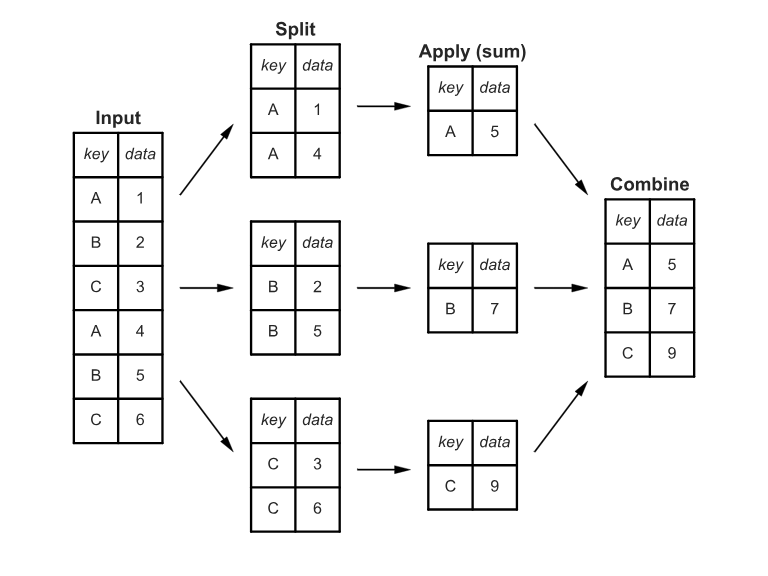
이미지출처: https://jakevdp.github.io/blog/2017/03/22/group-by-from-scratch/

#### **groupby()**: 그룹 연산을 실행하기 위한 그룹화 함수
- `groupby()`로 그룹을 분리하고 이후 연산을 실행
- 위 그림을 수행한 예

In [14]:
d = {
    'key':['A','B','C','A','B','C'],
   'data':[1, 2, 3, 4, 5, 6]}
 
df_ex = pd.DataFrame(d)
df_ex

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [15]:
# 그룹화를 할 기준이 되는 열을 groupby()에 인수로 전달
# 이후 연산을 할 대상이 되는 열을 선택하고
# 마지막으로 연산을 수행할 함수를 추가
df_ex.groupby('key')['data'].sum()

key
A    5
B    7
C    9
Name: data, dtype: int64

### 2. 그룹 연산 적용
- Wteam 별 Wscore에 대한 적용
- df['Wscore'].mean()은 모든 행에 있는 Wscore의 평균을 계산
- 반면, Wteam 별로 Wscore의 평균을 구하고 싶다면, `groupby('Wteam')`을 사용

In [16]:
df.groupby('Wteam')['Wscore'].mean().head() #상위 5개만 출력

Wteam
1101    78.111111
1102    69.893204
1103    75.839768
1104    75.825944
1105    74.960894
Name: Wscore, dtype: float64

In [17]:
# groupby를 쓰지 않았을 때와 비교
df['Wscore'].mean() # 전체 평균을 계산

76.60032074004226

아래는 이긴 팀 별로, home, away, neutral에서 각각 몇 번 이겼는지를 구하는 예이다.

In [18]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        12
       A         3
       N         3
1102   H       204
       A        73
       N        32
1103   H       324
       A       153
       N        41
Name: count, dtype: int64

In [19]:
# groupby를 쓰지 않았을 때와 비교
df['Wloc'].value_counts().head(9)

Wloc
H    86471
A    44229
N    14589
Name: count, dtype: int64

이긴 팀 별로 가장 큰 점수로 이긴 경기의 이긴 팀과 점수는 어떻게 구할 수 있을까? 
- 아래와 같이 간단하게 구할 수 있다.

In [20]:
df.groupby('Wteam')['Wscore'].max()

Wteam
1101     95
1102    111
1103    109
1104    114
1105    114
       ... 
1460    136
1461    112
1462    125
1463    105
1464    115
Name: Wscore, Length: 364, dtype: int64

그렇다면 이긴 팀이 가장 큰 점수로 이긴 경기의 이긴 팀, 진 팀, 이긴 팀의 점수와 진 팀의 점수는 구할 수 있을까? 듣기만 해도 복잡한다.<br>
이를 위해서는 groupby, idxmax, loc를 조합해서 세 단계에 거쳐 구해야 한다. <br>
1. 먼저 groupby와 idxmax를 이용해 이긴 팀이 가장 큰 점수로 이긴 경기의 인덱스를 구한다.
2. index와 loc을 이용해 그 경기의 행들을 구한다.
3. 행에서 이긴 팀, 진 팀, 이긴 팀의 점수와 진 팀의 점수에 해당하는 값을 추출한다.

In [25]:
# 1. 먼저 groupby와 idxmax를 이용해 이긴 팀이 가장 큰 점수로 이긴 경기의 인덱스를 구한다.
w_index = df.groupby('Wteam')['Wscore'].idxmax()
w_index.head()

Wteam
1101    137131
1102     59820
1103     16698
1104     83801
1105     73906
Name: Wscore, dtype: int64

In [30]:
# 2. index와 loc을 이용해 그 경기의 행들을 구한다.
df_w = df.loc[w_index]
df_w.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
137131,2015,71,1101,95,1322,81,A,0
59820,1999,113,1102,111,1176,88,A,0
16698,1989,65,1103,109,1134,68,A,0
83801,2005,30,1104,114,1190,77,H,0
73906,2002,127,1105,114,1341,82,H,0


In [31]:
# 3. 행에서 이긴 팀, 진 팀, 이긴 팀의 점수와 진 팀의 점수에 해당하는 값을 추출한다.
df_w[['Wteam', 'Lteam', 'Wscore', 'Lscore']].head()

,Wteam,Lteam,Wscore,Lscore
137131,1101,1322,95,81
59820,1102,1176,111,88
16698,1103,1134,109,68
83801,1104,1190,114,77
73906,1105,1341,114,82


In [32]:
# 위 3단계를 한꺼번에
df.loc[df.groupby('Wteam')['Wscore'].idxmax()][['Wteam', 'Lteam', 'Wscore', 'Lscore']].head()

,Wteam,Lteam,Wscore,Lscore
137131,1101,1322,95,81
59820,1102,1176,111,88
16698,1103,1134,109,68
83801,1104,1190,114,77
73906,1105,1341,114,82


#### 두 개 이상의 key에 대해 그룹 연산
- `df.groupby()`에 두 개 이상의 키를 리스트 형태로 줘서 수행
- Season 별, Wteam 별로 이긴 팀의 점수를 알고 싶다면

In [33]:
df.groupby(['Season', 'Wteam'])['Wscore'].max()

Season  Wteam
1985    1102      85
        1103      88
        1104     100
        1106      90
        1108     112
                ... 
2016    1460      87
        1461      84
        1462      98
        1463      99
        1464     103
Name: Wscore, Length: 10172, dtype: int64

In [35]:
# size()는 각 그룹의 크기(행의 수)를 반환
df.groupby(['Season', 'Wteam']).size()

Season  Wteam
1985    1102      5
        1103      9
        1104     21
        1106     10
        1108     19
                 ..
2016    1460     20
        1461     12
        1462     27
        1463     21
        1464      9
Length: 10172, dtype: int64

In [36]:
# count()와의 차이를 확인
df.groupby(['Season', 'Wteam']).count()

Daynum  Wscore  Lteam  Lscore  Wloc  Numot
Season Wteam                                            
1985   1102        5       5      5       5     5      5
       1103        9       9      9       9     9      9
       1104       21      21     21      21    21     21
       1106       10      10     10      10    10     10
       1108       19      19     19      19    19     19
...              ...     ...    ...     ...   ...    ...
2016   1460       20      20     20      20    20     20
       1461       12      12     12      12    12     12
       1462       27      27     27      27    27     27
       1463       21      21     21      21    21     21
       1464        9       9      9       9     9      9

[10172 rows x 6 columns]

### 3. 그룹 순회
- 각 그룹에 대해 복잡한 처리를 하고 싶을 때 사용

In [43]:
for name, group in df.groupby("Season"):
    print(name)
    print(group.head())
    # 시즌 안에서 이긴 팀 별로 점수의 최대값 출력
    print(group.groupby('Wteam')['Wscore'].max().head())
    break # 한 시즌만 출력하고 종료

1985
   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985      20   1228      81   1328      64    N      0
1    1985      25   1106      77   1354      70    H      0
2    1985      25   1112      63   1223      56    H      0
3    1985      25   1165      70   1432      54    H      0
4    1985      25   1192      86   1447      74    H      0
Wteam
1102     85
1103     88
1104    100
1106     90
1108    112
Name: Wscore, dtype: int64


### 4. 데이터 집계(Aggregation)
- 집계 함수(aggregation function)를 이용해서 그룹 별로 다양한 집계가 가능
- 적용 가능한 집계 함수(메서드) 참조: https://pandas.pydata.org/docs/reference/groupby.html

|함수|설명|
|-|-|
|count|NA가 아닌 값의 수|
|sum|NA가 아닌 값의 합계|
|mean|NA가 아닌 값의 평균|
|min, max|NA가 아닌 값의 최소값, 최대값|
|median|NA가 아닌 값의 중앙값|
|quantile|사분위수 계산|
|std, var|표준편차와 분산|

In [47]:
df.groupby(['Season', 'Wteam'])['Wscore'].max().head()

Season  Wteam
1985    1102      85
        1103      88
        1104     100
        1106      90
        1108     112
Name: Wscore, dtype: int64

#### aggregate()를 활용한 다수 함수 적용
- `aggregate()` 혹은 `agg()`를 이용하면 다수의 집계 함수 사용이 가능

In [50]:
df.groupby(['Season', 'Wteam'])['Wscore'].agg(['min', 'max', 'mean']).head()

min  max       mean
Season Wteam                     
1985   1102    52   85  71.000000
       1103    54   88  70.222222
       1104    42  100  72.095238
       1106    61   90  75.100000
       1108    58  112  85.842105

- 열 별로 다른 집계 함수를 적용하고 싶으면 딕셔너리를 이용

In [51]:
dict_agg = {'Wscore':'max', 'Lscore':'min'}
df.groupby(['Season', 'Wteam']).agg(dict_agg).head()

Wscore  Lscore
Season Wteam                
1985   1102       85      49
       1103       88      53
       1104      100      31
       1106       90      52
       1108      112      54

- 더 복잡하게, 열 별로 여러 개의 집계 함수를 적용할 수도 있음

In [55]:
dict_agg = {'Wscore':['min', 'max'], 'Lscore':['min', 'max']}
df.groupby(['Season', 'Wteam']).agg(dict_agg).head()

Wscore      Lscore    
                min  max    min max
Season Wteam                       
1985   1102      52   85     49  79
       1103      54   88     53  86
       1104      42  100     31  77
       1106      61   90     52  79
       1108      58  112     54  86

### 5. 피벗 테이블과 교차표
- 피벗 테이블: 데이터 요약 도구
- `groupby()`를 통해서도 구현할 수 있으나, 보다 간편하게 사용이 가능
- index에는 그룹화에 사용할 항목을, 그룹 안에서 집계의 대상이 되는 항목을 기술
- 피벗 테이블은 기본적으로 mean()을 계산. aggfun 매개변수를 이용하면 원하는 함수 지정이 가능

In [79]:
df.groupby(['Season', 'Wteam'])[['Lscore', 'Wscore']].mean()

Lscore     Wscore
Season Wteam                      
1985   1102   61.000000  71.000000
       1103   62.666667  70.222222
       1104   58.904762  72.095238
       1106   65.600000  75.100000
       1108   72.000000  85.842105
...                 ...        ...
2016   1460   61.400000  73.450000
       1461   65.000000  73.416667
       1462   68.518519  83.222222
       1463   60.190476  78.238095
       1464   76.333333  85.888889

[10172 rows x 2 columns]

In [76]:
df.pivot_table(index=['Season', 'Wteam'],
               values=['Lscore', 'Wscore'])

Lscore     Wscore
Season Wteam                      
1985   1102   61.000000  71.000000
       1103   62.666667  70.222222
       1104   58.904762  72.095238
       1106   65.600000  75.100000
       1108   72.000000  85.842105
...                 ...        ...
2016   1460   61.400000  73.450000
       1461   65.000000  73.416667
       1462   68.518519  83.222222
       1463   60.190476  78.238095
       1464   76.333333  85.888889

[10172 rows x 2 columns]

In [80]:
# margins=True를 사용하면 총합 혹은 부분합을 계산해줌
df.pivot_table(index=['Season', 'Wteam'],
               values=['Lscore', 'Wscore'],
               margins=True)

Lscore     Wscore
Season Wteam                      
1985   1102   61.000000  71.000000
       1103   62.666667  70.222222
       1104   58.904762  72.095238
       1106   65.600000  75.100000
       1108   72.000000  85.842105
...                 ...        ...
2016   1461   65.000000  73.416667
       1462   68.518519  83.222222
       1463   60.190476  78.238095
       1464   76.333333  85.888889
All           64.497009  76.600321

[10173 rows x 2 columns]

In [81]:
# colummns를 사용하면 values의 항목들에 대해 다시 columns에서 지정한 값 별로 그룹을 나눠서 계산
df.pivot_table(index=['Season', 'Wteam'],
               columns='Wloc',
               values=['Lscore', 'Wscore'],
               margins=True)

Lscore                                      Wscore  \
Wloc                  A          H          N        All          A   
Season Wteam                                                          
1985   1102   65.000000  55.000000        NaN  61.000000  70.666667   
       1103   73.500000  59.571429        NaN  62.666667  79.500000   
       1104   54.400000  61.133333  48.000000  58.904762  69.600000   
       1106   52.000000  67.750000  62.000000  65.600000  72.000000   
       1108   73.375000  72.000000  68.333333  72.000000  80.125000   
...                 ...        ...        ...        ...        ...   
2016   1461   61.250000  66.875000        NaN  65.000000  71.000000   
       1462   66.500000  70.866667  63.750000  68.518519  79.375000   
       1463   58.333333  62.000000  57.000000  60.190476  77.666667   
       1464   75.250000  79.250000  69.000000  76.333333  85.000000   
All           65.336499  64.105677  64.271437  64.497009  74.781343   

                                               
Wloc                  H          N        All  
Season Wteam                                   
1985   1102   71.500000        NaN  71.000000  
       1103   67.571429        NaN  70.222222  
       1104   74.133333  54.000000  72.095238  
       1106   73.625000  90.000000  75.100000  
       1108   93.625000  80.333333  85.842105  
...                 ...        ...        ...  
2016   1461   74.625000        NaN  73.416667  
       1462   85.400000  82.750000  83.222222  
       1463   79.454545  70.000000  78.238095  
       1464   88.500000  79.000000  85.888889  
All           77.739092  75.365207  76.600321  

[10173 rows x 8 columns]

In [83]:
# aggfunc에 'max'를 할당해서 평균 대신 최대값을 계산
df.pivot_table(index=['Season', 'Wteam'],
               columns='Wloc',
               values=['Lscore', 'Wscore'],
               aggfunc='max',
               margins=True)

Lscore                    Wscore                   
Wloc              A      H      N  All      A      H      N  All
Season Wteam                                                    
1985   1102    79.0   56.0    NaN   79   82.0   85.0    NaN   85
       1103    86.0   66.0    NaN   86   88.0   80.0    NaN   88
       1104    57.0   77.0   48.0   77   81.0  100.0   54.0  100
       1106    52.0   79.0   62.0   79   72.0   83.0   90.0   90
       1108    83.0   86.0   75.0   86   90.0  112.0   95.0  112
...             ...    ...    ...  ...    ...    ...    ...  ...
2016   1461    68.0   78.0    NaN   78   84.0   84.0    NaN   84
       1462    70.0   93.0   77.0   93   88.0   98.0   90.0   98
       1463    67.0   77.0   57.0   77   90.0   99.0   70.0   99
       1464    98.0   93.0   69.0   98  100.0  103.0   79.0  103
All           144.0  150.0  123.0  150  162.0  186.0  152.0  186

[10173 rows x 8 columns]

#### 교차표 - pandas.crosstab()
- 그룹의 빈도를 계산하는 피벗 테이블
- 행에 사용할 그룹화 항목(열)과 열에 사용할 그룹화 항목(열)을 입력하면 각 그룹에 대한 빈도를 보여줌
- margins를 사용하면 행과 열에서 합계를 볼 수 있음
- pivot_table()을 이용해 동일한 결과를 얻을 수 있으나, 비교적 간편하게 사용이 가능

In [84]:
pd.crosstab([df['Season'], df['Wteam']],
            df['Wloc'],
            margins=True)

Wloc              A      H      N     All
Season Wteam                             
1985   1102       3      2      0       5
       1103       2      7      0       9
       1104       5     15      1      21
       1106       1      8      1      10
       1108       8      8      3      19
...             ...    ...    ...     ...
2016   1461       4      8      0      12
       1462       8     15      4      27
       1463       9     11      1      21
       1464       4      4      1       9
All           44229  86471  14589  145289

[10173 rows x 4 columns]

Tip: **values** 속성은 데이터프레임의 값들을 Numpy 형태로 반환
- 따라서 **values** 속성은 Numpy ndarray와 동일한 방법으로 사용이 가능

In [23]:
print(type(df.values))
print(df.values.shape)
df.values

<class 'numpy.ndarray'>
(145289, 8)


array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2016, 132, 1246, ..., 77, 'N', 1],
       [2016, 132, 1277, ..., 62, 'N', 0],
       [2016, 132, 1386, ..., 74, 'N', 0]], dtype=object)